In [1]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
import pdb
setup_text_plots(fontsize=25, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

In [2]:
def scalarmap(v,cmap='plasma'):
    import matplotlib.cm as cmx
    import matplotlib.colors as colors
    cm = plt.get_cmap(cmap)
    cNorm  = colors.Normalize(vmin=np.min(v), vmax=np.max(v))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    colors = scalarMap.to_rgba(v)
    return colors,scalarMap,cNorm

def plot_filters(wheel, ax):

    Nfilt = len(wheel.__dict__)
    
    colors,scalarMap,cNorm = scalarmap(np.arange(Nfilt),cmap='Dark2')

    ax1 = ax.twinx()
    ax1.axes.get_yaxis().set_visible(False) 
    #ax1.set_ylabel(r"Filter Response", rotation=270, labelpad=30)

    i = 0
    fmax = 1.0
    for attr, value in wheel.__dict__.iteritems():
        if np.max(value.response) > fmax: fmax = np.max(value.response)
        wl, response = value.wl, value.response
        #ax1.plot(wl,response, lw=3.0, label=value.name, c=colors[i])
        ax1.fill_between(wl,response, color=colors[i], alpha=0.3)
        i += 1
    ax1.set_ylim([0.0,fmax])

In [3]:
import coronagraph as cg

In [4]:
landsat = cg.filters.landsat()
jc = cg.filters.johnson_cousins()

In [5]:
T = cg.Telescope(mode='Imaging')
print T.filter_wheel

['U', 'B', 'V', 'R', 'I']



In [6]:
smart_rad_file = '../planets/F2V_5.e-1fCO2_1.e6H2Volc_1.e10BIF.out_toa.rad'
wl, wno, solar_spec, TOA_flux, rad_streams = cg.readsmart.rad(smart_rad_file)

In [7]:
Amod1 = cg.convolve_spec(TOA_flux, wl, T.filter_wheel)
Amod2 = cg.convolve_spec(TOA_flux, wl, T.filter_wheel, forceTopHat=True)

coronagraph/convolve_spec.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (x[1].wl == None) or (x[1].response == None) or forceTopHat:


In [8]:
tdict = sorted(T.filter_wheel.__dict__.iteritems(), key=lambda x: x[1].bandcenter)
lam = [x[1].bandcenter for x in tdict]
dlam = np.array([x[1].FWHM for x in tdict])/2
print dlam

[ 0.017    0.03905  0.04955  0.05328  0.1446 ]


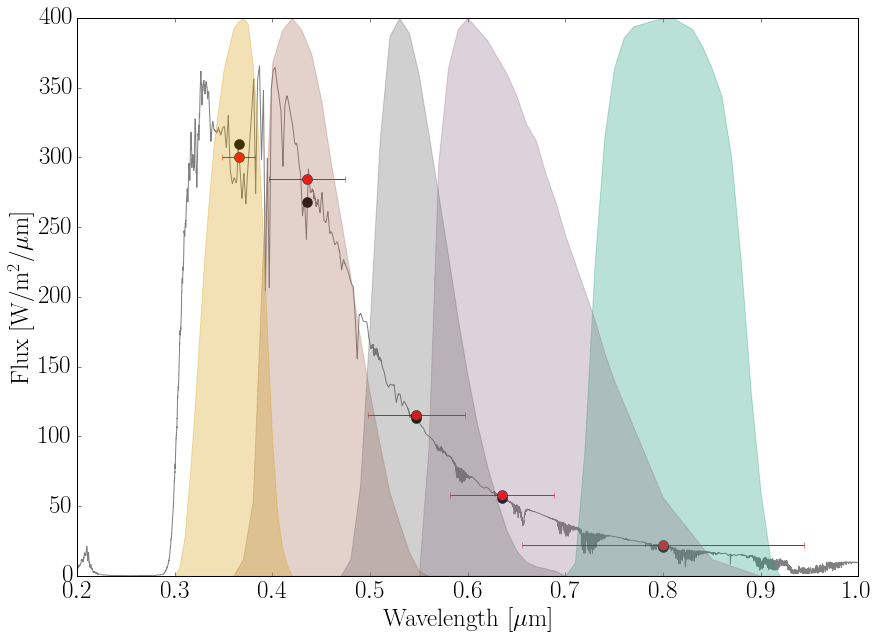

In [9]:
fig = plt.figure(figsize=(14,10))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(wl, TOA_flux, alpha=0.5, c='k')
ax0.plot(lam, Amod1, 'o', c='k', ms=10.)
ax0.errorbar(lam, Amod2, xerr=dlam, c='r', ms=10., fmt='o')
plot_filters(T.filter_wheel, ax0)
ax0.set_xlim([0.2,1.0])

ax0.set_ylabel(r'Flux [W/m$^2$/$\mu$m]')
ax0.set_xlabel(r'Wavelength [$\mu$m]$')

In [10]:
T.filter_wheel = cg.filters.johnson_cousins2()
print T.filter_wheel

['U', 'B', 'V', 'R', 'I']



In [11]:
Amod1 = cg.convolve_spec(TOA_flux, wl, T.filter_wheel)
Amod2 = cg.convolve_spec(TOA_flux, wl, T.filter_wheel, forceTopHat=True)

In [12]:
tdict = sorted(T.filter_wheel.__dict__.iteritems(), key=lambda x: x[1].bandcenter)
lam = [x[1].bandcenter for x in tdict]
dlam = np.array([x[1].FWHM for x in tdict])/2
print dlam

[ 0.017    0.03905  0.04955  0.05328  0.1446 ]


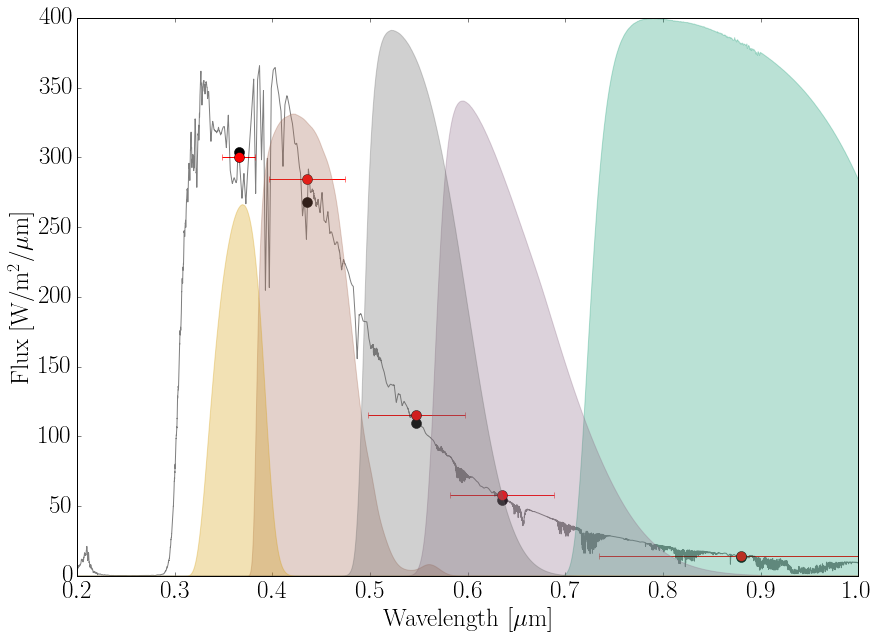

In [13]:
fig = plt.figure(figsize=(14,10))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(wl, TOA_flux, alpha=0.5, c='k')
ax0.plot(lam, Amod1, 'o', c='k', ms=10.)
ax0.errorbar(lam, Amod2, xerr=dlam, c='r', ms=10., fmt='o')
plot_filters(T.filter_wheel, ax0)
ax0.set_xlim([0.2,1.0])

ax0.set_ylabel(r'Flux [W/m$^2$/$\mu$m]')
ax0.set_xlabel(r'Wavelength [$\mu$m]$')

In [14]:
T.filter_wheel = cg.filters.landsat()
print T.filter_wheel

['CA', 'B', 'G', 'Pan', 'R', 'NIR', 'Cirrus', 'SWIR1', 'SWIR2']



In [15]:
Amod1 = cg.convolve_spec(TOA_flux, wl, T.filter_wheel)
Amod2 = cg.convolve_spec(TOA_flux, wl, T.filter_wheel, forceTopHat=True)

Error in degrade_spec, switching to numpy interpolation.


In [16]:
tdict = sorted(T.filter_wheel.__dict__.iteritems(), key=lambda x: x[1].bandcenter)
lam = [x[1].bandcenter for x in tdict]
dlam = np.array([x[1].FWHM for x in tdict])/2.0

[]

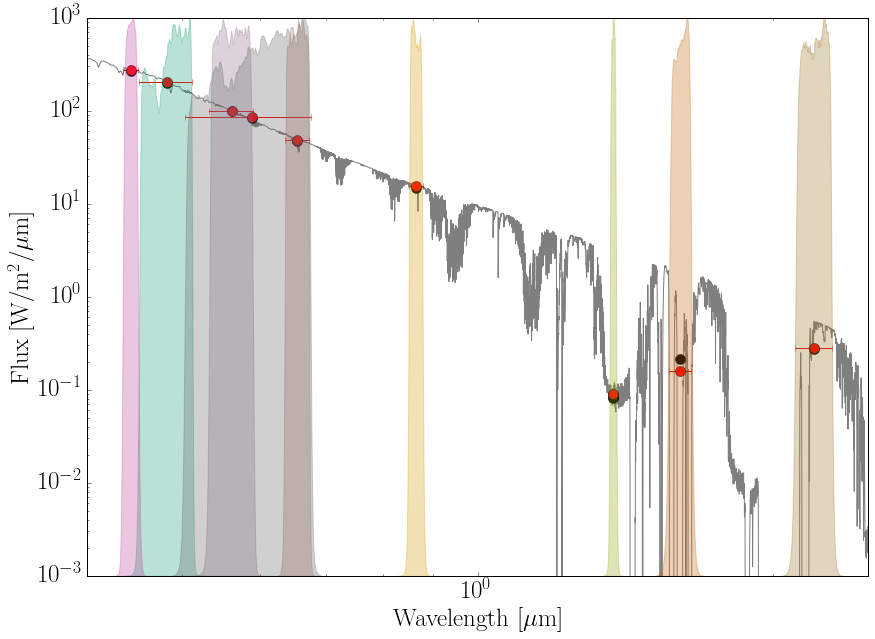

In [17]:
fig = plt.figure(figsize=(14,10))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(wl, TOA_flux, alpha=0.5, c='k')
ax0.plot(lam, Amod1, 'o', c='k', ms=10.)
ax0.errorbar(lam, Amod2, xerr=dlam, c='r', ms=10., fmt='o')
plot_filters(T.filter_wheel, ax0)
ax0.set_xlim([0.4,2.5])
ax0.set_ylim([1e-3, 1e3])

ax0.set_ylabel(r'Flux [W/m$^2$/$\mu$m]')
ax0.set_xlabel(r'Wavelength [$\mu$m]$')

ax0.loglog()

In [18]:
P = cg.Planet()

In [19]:
S = cg.Star()

In [20]:
itime = 1.0

In [21]:
T.filter_wheel = jc

/astro/apps6/anaconda2.0/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


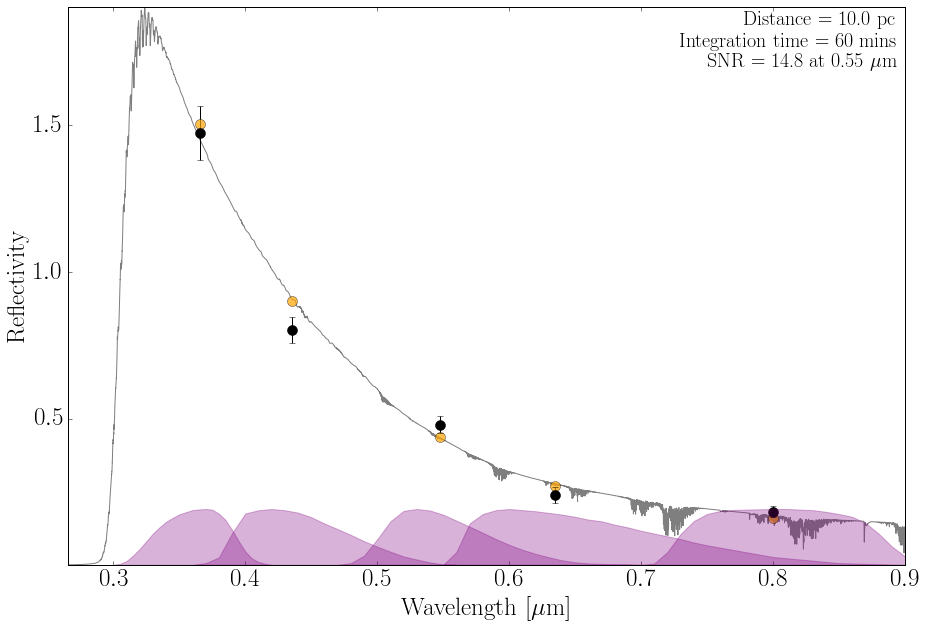

In [22]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(smart_rad_file, itime, T, P, S)

In [23]:
T.filter_wheel = landsat

Error in degrade_spec, switching to numpy interpolation.


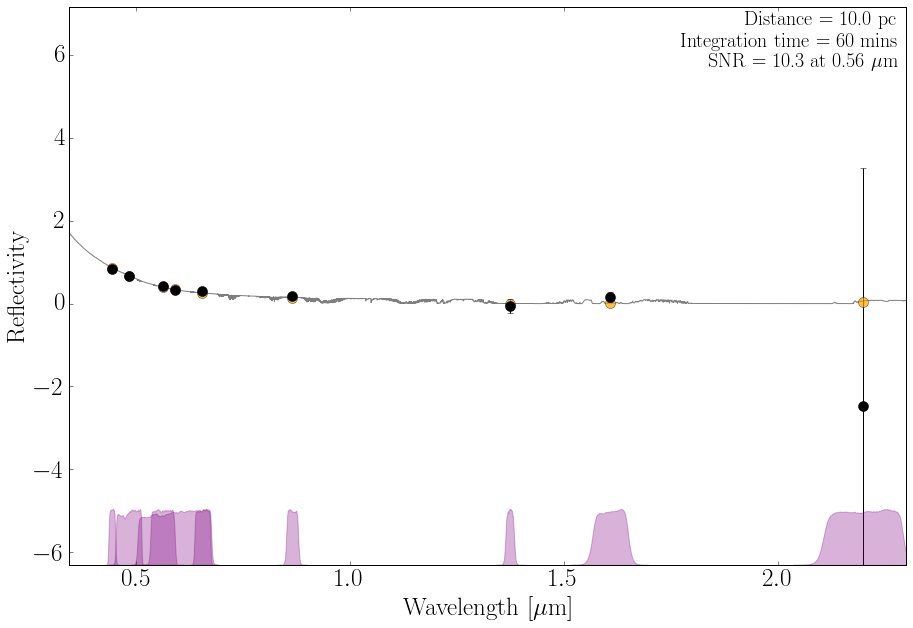

In [24]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(smart_rad_file, itime, T, P, S)

In [25]:
modified_landsat = cg.filters.Wheel()

In [26]:
modified_landsat.add_new_filter(landsat.CA, name='CA')
modified_landsat.add_new_filter(landsat.B, name='B')
modified_landsat.add_new_filter(landsat.Cirrus, name='Cirrus')
modified_landsat.add_new_filter(landsat.G, name='G')
modified_landsat.add_new_filter(landsat.NIR, name='NIR')
modified_landsat.add_new_filter(landsat.Pan, name='Pan')
modified_landsat.add_new_filter(landsat.R, name='R')
modified_landsat.add_new_filter(landsat.SWIR1, name='SWIR1')

In [27]:
T.filter_wheel = modified_landsat

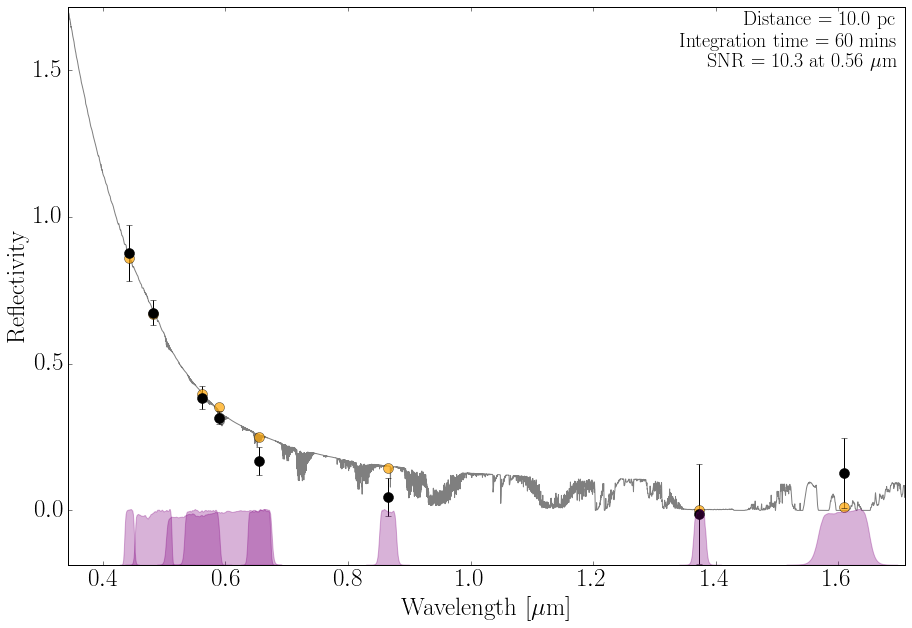

In [28]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(smart_rad_file, itime, T, P, S)

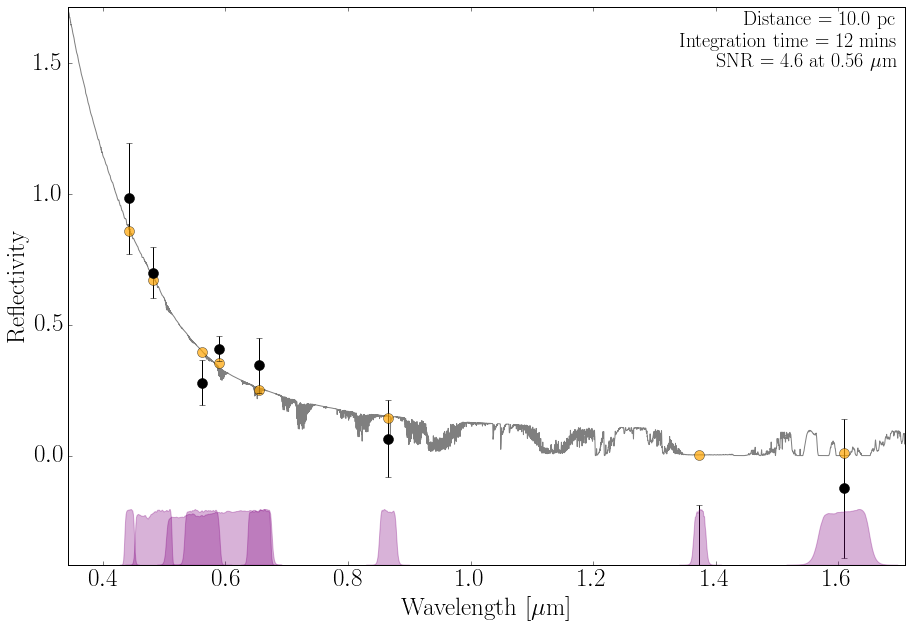

In [29]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(smart_rad_file, .2, T, P, S)

In [30]:
jc2 = cg.filters.johnson_cousins2()
T.filter_wheel = jc2

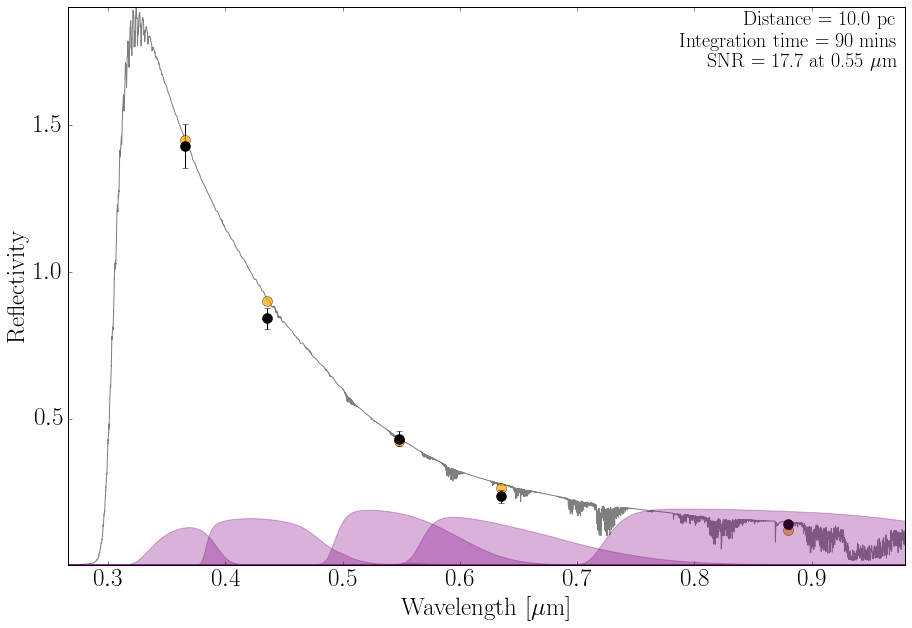

In [31]:
lam, spec, sig, wlhr, Ahr = cg.smart_observation(smart_rad_file, 1.5, T, P, S)